# Data Preprocessing
This notebook covers the necessary preprocessing steps before building the churn prediction model.

---

### ✅ Next Steps:

1. Handle missing values.
2. Convert data types (e.g. TotalCharges to numeric).
3. Encode categorical variables.
4. Drop irrelevant features.
5. Scale numerical features.
6. Split the dataset into training and testing sets.


Some of these we made it before : )

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv(r'../DataSet/Telco-Customer-Churn-preprocessed.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Step 1: Missing Values Check ✅

We inspected the dataset for missing values using `df.info()` and `df.isnull().sum()`.  
The dataset contains **no null values**, indicating that it's already clean and ready for preprocessing.

👉 No imputation or removal of rows/columns is needed for this step.

## Step 2: Drop Irrelevant Columns

To keep our dataset clean and focused on predictive features only, we removed irrelevant columns such as `customerID` and others that showed weak correlation with churn during EDA.

We retained only the most impactful features based on prior analysis:

- SeniorCitizen
- Contract
- TechSupport
- InternetService
- PaymentMethod
- Tenure
- MonthlyCharges
- TotalCharges
- Churn (target variable)


In [5]:
df = df[['SeniorCitizen', 'Contract', 'TechSupport', 'InternetService',
         'PaymentMethod', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

## Step 3: Encoding Categorical Variables

To prepare the data for machine learning models, we encoded categorical columns:

- Applied **One-Hot Encoding** to the following multi-class categorical columns:
  - Contract
  - TechSupport
  - InternetService
  - PaymentMethod

- Converted the target variable `Churn` from "Yes/No" to binary values:  
  - `Yes` → 1  
  - `No` → 0

We also used `drop_first=True` to avoid the dummy variable trap and reduce dimensionality.


In [6]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df = pd.get_dummies(df, columns=['Contract', 'TechSupport', 'InternetService', 'PaymentMethod'])


## Step 4: Feature Scaling

We applied feature scaling to normalize the range of numerical variables.

- **Why?**  
  Machine learning algorithms like logistic regression and SVM perform better when features are on the same scale.

- **How?**  
  We used `StandardScaler` to transform the following features:
  - `tenure`
  - `MonthlyCharges`
  - `TotalCharges`

This transformation standardizes each feature to have a mean of 0 and a standard deviation of 1.


In [7]:
scaler = StandardScaler()

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[numerical_features] = scaler.fit_transform(df[numerical_features])


## Step 5: Train-Test Split

We divided the dataset into training and testing sets using `train_test_split`.

- **Purpose:**  
  To evaluate the model's performance on unseen data.

- **Details:**
  - 80% for training
  - 20% for testing
  - Stratified sampling to ensure balanced churn distribution in both sets


In [8]:
x = df.drop('Churn', axis=1)
y = df['Churn']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

### Logistic Regression 

In [10]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


from sklearn.metrics import classification_report

y_probs = log_model.predict_proba(X_test)[:, 1]

for threshold in [0.4]:
    y_pred = (y_probs >= threshold).astype(int)
    print(f'\nThreshold = {threshold}')
    print(classification_report(y_test, y_pred, digits=2))


Accuracy: 0.8031272210376688
Confusion Matrix:
 [[922 111]
 [166 208]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.80      0.80      1407


Threshold = 0.4
              precision    recall  f1-score   support

           0       0.88      0.82      0.84      1033
           1       0.57      0.68      0.62       374

    accuracy                           0.78      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.80      0.78      0.79      1407



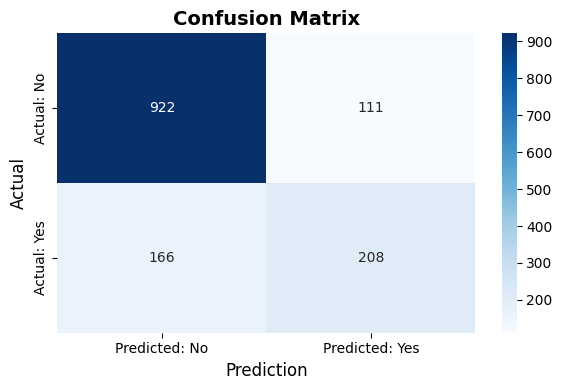

In [11]:
cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: No', 'Predicted: Yes'],
            yticklabels=['Actual: No', 'Actual: Yes'])

plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.tight_layout()
plt.show()


### Try RandomForest 

In [12]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.7683013503909026
Confusion Matrix:
 [[892 141]
 [185 189]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      1033
           1       0.57      0.51      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



In [13]:
xgb_model = XGBClassifier(
    n_estimators=1200,
    max_depth=6,
    learning_rate=0.1,
    objective='binary:logistic',  
    use_label_encoder=False,
    eval_metric='logloss',
    scaler=StandardScaler(),
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

c:\Users\xxabo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:25:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scaler", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7562189054726368
Confusion Matrix:
 [[876 157]
 [186 188]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84      1033
           1       0.54      0.50      0.52       374

    accuracy                           0.76      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.76      0.75      1407



In [ ]:
# Logistic Regression
joblib.dump(log_model, '../Models/Best_Model_Logistic_Before_SMOTE.pkl')

# Random Forest
joblib.dump(rf_model, '../Models/RandomForest_Before_SMOTE.pkl')

# XGBoost
joblib.dump(xgb_model, '../Models/xgboost_Before_SMOTE.pkl')


['../Models/xgboost_Before_SMOTE.pkl']

#### WE USING SMOTE Cuz as we can see we have problem with the customers who's leave SO SMOTE will make it balance

In [15]:
smote = SMOTE(random_state=42)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print(y_train.value_counts())      # before
print(y_train_sm.value_counts())   # after

Churn
0    4130
1    1495
Name: count, dtype: int64
Churn
0    4130
1    4130
Name: count, dtype: int64


c:\Users\xxabo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\xxabo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [16]:
logs_model = LogisticRegression(random_state=42, max_iter=1000, )
logs_model.fit(X_train_sm, y_train_sm)

y_pred_log = logs_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Accuracy: 0.7235252309879175
Confusion Matrix:
 [[721 312]
 [ 77 297]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.60       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.72      0.74      1407



In [17]:
xgb_model_sm = XGBClassifier(
    n_estimators=1200,
    max_depth=6,
    learning_rate=0.1,
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model_sm.fit(X_train_sm, y_train_sm)


y_pred_xgb_sm = xgb_model_sm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb_sm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_sm))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb_sm))


c:\Users\xxabo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:25:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7427149964463398
Confusion Matrix:
 [[815 218]
 [144 230]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      1033
           1       0.51      0.61      0.56       374

    accuracy                           0.74      1407
   macro avg       0.68      0.70      0.69      1407
weighted avg       0.76      0.74      0.75      1407



In [18]:
RandomForestSMOTE = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

RandomForestSMOTE.fit(X_train_sm, y_train_sm)

y_pred_rf_sm = RandomForestSMOTE.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf_sm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_sm))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_sm))

Accuracy: 0.7370291400142146
Confusion Matrix:
 [[815 218]
 [152 222]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81      1033
           1       0.50      0.59      0.55       374

    accuracy                           0.74      1407
   macro avg       0.67      0.69      0.68      1407
weighted avg       0.75      0.74      0.74      1407



#### Save our models After we using SMOTE 

In [19]:
joblib.dump(logs_model, '../Models/Logistic_After_SMOTE.pkl')
joblib.dump(xgb_model_sm, '../Models/xgboost_after_SMOTE.pkl')
joblib.dump(RandomForestSMOTE, '../Models/RandomForest_After_SMOTE.pkl')

['../Models/RandomForest_After_SMOTE.pkl']

In [20]:
print("Churn = 0")
print(df[df['Churn'] == 0].describe())

print("\nChurn = 1")
print(df[df['Churn'] == 1].describe())


Churn = 0
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges   Churn
count    5163.000000  5163.000000     5163.000000   5163.000000  5163.0
mean        0.128995     0.213019       -0.116036      0.120022     0.0
std         0.335227     0.980990        1.033597      1.027727     0.0
min         0.000000    -1.280248       -1.547283     -0.999069     0.0
25%         0.000000    -0.709833       -1.319586     -0.752434     0.0
50%         0.000000     0.227279       -0.011575     -0.264580     0.0
75%         0.000000     1.164390        0.787027      0.873915     0.0
max         1.000000     1.612573        1.793381      2.818813     0.0

Churn = 1
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges   Churn
count    1869.000000  1869.000000     1869.000000   1869.000000  1869.0
mean        0.254682    -0.588451        0.320542     -0.331554     1.0
std         0.435799     0.795775        0.819911      0.834207     0.0
min         0.000000    -1.280248       -1.

#### Feature Engineering

In [21]:
df['short_term_customer'] = (df['tenure'] < threshold).astype(int)
df['high_monthly_charge'] = (df['MonthlyCharges'] > df['MonthlyCharges'].median()).astype(int)
df['risk_score'] = (
    df['short_term_customer'] +
    df['high_monthly_charge'] +
    df['SeniorCitizen']
)

df['avg_monthly_payment'] = df['TotalCharges'] / (df['tenure'] + 1e-5)


In [ ]:
ScaleFeatures = ['avg_monthly_payment']  

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[ScaleFeatures] = scaler.fit_transform(df_scaled[ScaleFeatures])


In [ ]:
xe = df.drop('Churn', axis=1)
ye = df['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xe, ye, test_size=0.2, random_state=42)

log_model_newFeatures = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Accuracy: 0.7903340440653873
Confusion Matrix:
 [[922 111]
 [184 190]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [41]:
XGboost_model = XGBClassifier(scale_pos_weight=3, random_state=42, use_label_encoder=False, eval_metric='logloss')
XGboost_model.fit(X_train, y_train)

y_pred_xgb = XGboost_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.7505330490405118
Confusion Matrix:
 [[793 240]
 [111 263]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      1033
           1       0.52      0.70      0.60       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.78      0.75      0.76      1407



c:\Users\xxabo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:33:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
joblib.dump(XGboost_model, '../Models/SecBestModel_XGboost_with_Features_Engineering.pkl')
joblib.dump(log_model_newFeatures, '../Models/Model_Logistic_with_Features_Engineering.pkl')

['../Models/SecBestModel_XGboost_with_Features_Engineering.pkl']